<a href="https://colab.research.google.com/github/HanzhouLiu/Deep-Learning-with-Python-Exercises/blob/main/OverUnderFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
49/49 [==============================] - 3s 56ms/step - loss: 0.5370 - acc: 0.7466 - val_loss: 0.3452 - val_acc: 0.8718
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2629 - acc: 0.9111 - val_loss: 0.2941 - val_acc: 0.8816
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1954 - acc: 0.9283 - val_loss: 0.2853 - val_acc: 0.8860
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1601 - acc: 0.9436 - val_loss: 0.2948 - val_acc: 0.8828
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1434 - acc: 0.9513 - val_loss: 0.3184 - val_acc: 0.8778
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1208 - acc: 0.9591 - val_loss: 0.3545 - val_acc: 0.8704
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1113 - acc: 0.9633 - val_loss: 0.3583 - val_acc: 0.8709
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0913 - a

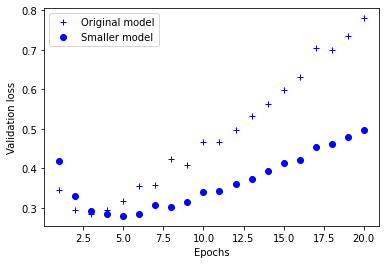

Epoch 1/20
49/49 [==============================] - 17s 344ms/step - loss: 0.6426 - acc: 0.7161 - val_loss: 0.2836 - val_acc: 0.8877
Epoch 2/20
49/49 [==============================] - 16s 324ms/step - loss: 0.2287 - acc: 0.9081 - val_loss: 0.3177 - val_acc: 0.8738
Epoch 3/20
49/49 [==============================] - 16s 325ms/step - loss: 0.1307 - acc: 0.9504 - val_loss: 0.6323 - val_acc: 0.7930
Epoch 4/20
49/49 [==============================] - 16s 324ms/step - loss: 0.0760 - acc: 0.9759 - val_loss: 0.4434 - val_acc: 0.8806
Epoch 5/20
49/49 [==============================] - 16s 327ms/step - loss: 0.0414 - acc: 0.9928 - val_loss: 0.4498 - val_acc: 0.8793
Epoch 6/20
49/49 [==============================] - 16s 326ms/step - loss: 0.0030 - acc: 0.9998 - val_loss: 0.6487 - val_acc: 0.8773
Epoch 7/20
49/49 [==============================] - 16s 330ms/step - loss: 0.0131 - acc: 0.9986 - val_loss: 0.6546 - val_acc: 0.8657
Epoch 8/20
49/49 [==============================] - 16s 322ms/step - 

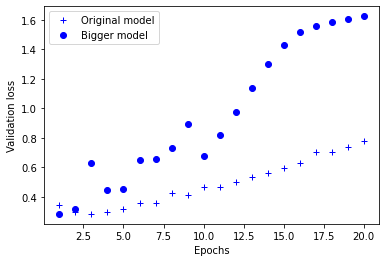

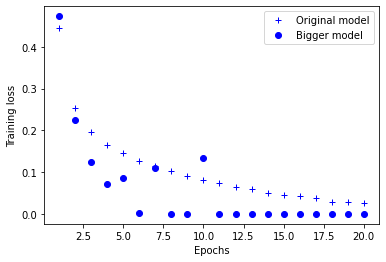

'\nThe bigger network gets its training loss near zero very \nquickly. The more capacity the network has, the quicker it will be able to model \nthe training data (resulting in a low training loss), but the more susceptible \nit is to overfitting (resulting in a large difference between the training and \nvalidation loss).\n'

In [1]:
# prepare data
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# fighting overfitting
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

# try it with a smaller network
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

# comparison of the validation losses of the original network and the smaller network
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# add to this benchmark a network that has much more capacity
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

# the bigger network fares compared to the reference one
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# the training losses for our two networks
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

"""
The bigger network gets its training loss near zero very 
quickly. The more capacity the network has, the quicker it will be able to model 
the training data (resulting in a low training loss), but the more susceptible 
it is to overfitting (resulting in a large difference between the training and 
validation loss).
"""